# **BOOTCAMP on Deep Learning and Computer Vision**
# **@Siliguri Institute of Technology, India**
# Week-9 | Date: Apr 05, 2024


# # Part-2: YOLO v5

In this part of the Lab/Tutorial session you will be exploring how to use the YOLO v5 object detector


So lets get started!


We will use the https://github.com/ultralytics/yolov5 repository for this tutorial

Reference: https://colab.research.google.com/github/ultralytics/yolov5/blob/master/tutorial.ipynb

# Step 1: Clone github repository

#### **Connect to Google Drive**

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


#### **Custom Dataset Setup (We will use Kangaroo dataset)**

In [2]:
# Change path to you google drive location of the dataset as needed
!unzip '/content/drive/MyDrive/SIT-DL-CV-Bootcamp-2023/Week9/Yolov5/yoloV5_kangaroo.zip'

Archive:  /content/gdrive/MyDrive/42028Version2023/Week9/Yolov5/yoloV5_kangaroo.zip
   creating: yolo_kangaroo/Kangaroo/
   creating: yolo_kangaroo/Kangaroo/test/
   creating: yolo_kangaroo/Kangaroo/test/images/
  inflating: yolo_kangaroo/Kangaroo/test/images/00001.jpg  
  inflating: yolo_kangaroo/Kangaroo/test/images/00002.jpg  
  inflating: yolo_kangaroo/Kangaroo/test/images/00003.jpg  
  inflating: yolo_kangaroo/Kangaroo/test/images/00004.jpg  
  inflating: yolo_kangaroo/Kangaroo/test/images/00005.jpg  
  inflating: yolo_kangaroo/Kangaroo/test/images/00006.jpg  
  inflating: yolo_kangaroo/Kangaroo/test/images/00007.jpg  
  inflating: yolo_kangaroo/Kangaroo/test/images/00009.jpg  
  inflating: yolo_kangaroo/Kangaroo/test/images/00010.jpg  
  inflating: yolo_kangaroo/Kangaroo/test/images/00011.jpg  
  inflating: yolo_kangaroo/Kangaroo/test/images/00012.jpg  
  inflating: yolo_kangaroo/Kangaroo/test/images/00013.jpg  
  inflating: yolo_kangaroo/Kangaroo/test/images/00014.jpg  
  inflat

#### **Clone the Github Repo (Default location /content/)**

In [3]:
# By Default Cloned under /content/
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 16525, done.
remote: Total 16525 (delta 0), reused 0 (delta 0), pack-reused 16525
Receiving objects: 100% (16525/16525), 15.00 MiB | 22.13 MiB/s, done.
Resolving deltas: 100% (11361/11361), done.


Install the required libraries

In [6]:
!pwd

/content/yolov5


In [7]:
%cd yolov5
from yolov5 import utils
#display = utils.notebook_init()  # checks Pytorch and GPU used
!pip install -r requirements.txt

[Errno 2] No such file or directory: 'yolov5'
/content/yolov5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 749.1/749.1 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 32.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 44.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 47.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

#### **Quick Reference on YAML**

#### [**What is YAML?**](https://circleci.com/blog/what-is-yaml-a-beginner-s-guide/)

YAML --> **Y**et **A**nother **M**arkup **L**anguage

YAML is a digestible data serialization language often used to create configuration files with any programming language.

Designed for human interaction, YAML is a strict superset of JSON, another data serialization language. But because it’s a strict superset, it can do everything that JSON can and more. One major difference is that newlines and indentation actually mean something in YAML, as opposed to JSON, which uses brackets and braces.

Reference and Source: https://circleci.com/blog/what-is-yaml-a-beginner-s-guide/

# Step 2: Setup Training Configuration

In [8]:
#@title Setup Training YAML File
number_of_classes = 1 #@param {type:"integer"}
with open('new_train_yaml', 'w+') as file:
    file.write(
        f"""
        # parameters
        nc: {number_of_classes}  # number of classes
        depth_multiple: 0.33  # model depth multiple
        width_multiple: 0.50  # layer channel multiple

        # anchors
        anchors:
          - [10,13, 16,30, 33,23]  # P3/8
          - [30,61, 62,45, 59,119]  # P4/16
          - [116,90, 156,198, 373,326]  # P5/32

        # YOLOv5 backbone
        backbone:
          # [from, number, module, args]
          [[-1, 1, Focus, [64, 3]],  # 0-P1/2
           [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
           [-1, 3, BottleneckCSP, [128]],
           [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
           [-1, 9, BottleneckCSP, [256]],
           [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
           [-1, 9, BottleneckCSP, [512]],
           [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
           [-1, 1, SPP, [1024, [5, 9, 13]]],
           [-1, 3, BottleneckCSP, [1024, False]],  # 9
          ]

        # YOLOv5 head
        head:
          [[-1, 1, Conv, [512, 1, 1]],
           [-1, 1, nn.Upsample, [None, 2, 'nearest']],
           [[-1, 6], 1, Concat, [1]],  # cat backbone P4
           [-1, 3, BottleneckCSP, [512, False]],  # 13

           [-1, 1, Conv, [256, 1, 1]],
           [-1, 1, nn.Upsample, [None, 2, 'nearest']],
           [[-1, 4], 1, Concat, [1]],  # cat backbone P3
           [-1, 3, BottleneckCSP, [256, False]],  # 17 (P3/8-small)

           [-1, 1, Conv, [256, 3, 2]],
           [[-1, 14], 1, Concat, [1]],  # cat head P4
           [-1, 3, BottleneckCSP, [512, False]],  # 20 (P4/16-medium)

           [-1, 1, Conv, [512, 3, 2]],
           [[-1, 10], 1, Concat, [1]],  # cat head P5
           [-1, 3, BottleneckCSP, [1024, False]],  # 23 (P5/32-large)

           [[17, 20, 23], 1, Detect, [nc, anchors]],  # Detect(P3, P4, P5)
          ]
        """
    )

# Step 3: Setup Dataset paths

In [9]:
#@title Setup Dataset Configuration (Data.yaml)
train_data_dir = "/content/yolo_kangaroo/Kangaroo/train" #@param {type:"string"}
val_data_dir = "/content/yolo_kangaroo/Kangaroo/valid" #@param {type:"string"}
class_names = ['kangaroo'] #@param {type:"raw"}
with open('new_data_yaml', 'w+') as file:
    file.write(
        f"""
        train: {train_data_dir}
        val: {val_data_dir}

        nc: {number_of_classes}
        names: {class_names}
        """
    )

# Step 4: Start Training

**Configuation to try:**

*   **Image Size**: 416
*   **Batch Size**: 16
*   **Epochs**: 200
*   **Data Source details** : new_data_yaml (Created earlier)
*   **Training details** : new_train_yaml (Created earlier)

Example:

!python /content/yolov5/train.py --**img** 416 --**batch** 16 --**epochs** 300 --**data** /content/yolov5/new_data_yaml --**cfg** /content/yolov5/new_train_yaml


In [10]:
!python /content/yolov5/train.py --img 416 --batch 16 --epochs 200 --data /content/yolov5/new_data_yaml --cfg /content/yolov5/new_train_yaml

2024-04-05 06:50:33.064226: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-05 06:50:33.064281: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-05 06:50:33.185581: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=/content/yolov5/new_train_yaml, data=/content/yolov5/new_data_yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=200, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, 

# Step 5: Test the trained model on sample images

In [11]:
!ls /content/yolov5/runs/train/exp

confusion_matrix.png				    PR_curve.png	   val_batch0_pred.jpg
events.out.tfevents.1712299835.5b7dde992a9b.3028.0  R_curve.png		   val_batch1_labels.jpg
F1_curve.png					    results.csv		   val_batch1_pred.jpg
hyp.yaml					    results.png		   val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch0.jpg	   val_batch2_pred.jpg
labels.jpg					    train_batch1.jpg	   weights
opt.yaml					    train_batch2.jpg
P_curve.png					    val_batch0_labels.jpg


### **Inference/Testing**
'detect.py' is used to run YOLOv5 testing/inference on different types of inputs such as: image, video, webcam input, directory glob, Youtube, RTSP/RTMP/HTTP Stream.

**Usage Syntax:**

```shell
python detect.py --source 0  # webcam
                          img.jpg  # image
                          vid.mp4  # video
                          path/  # directory
                          path/*.jpg  # glob
                          'https://youtu.beZgi9g1ksQHc'  # YouTube
                          'rtsp://example.com/media.mp4'  # RTSP, RTMP, HTTP stream
                 --weights path/to/weights
                 --img 416
                 --conf 0.5
                 --save-txt
```

In [12]:
!python /content/yolov5/detect.py --source '/content/yolo_kangaroo/Kangaroo/valid/images/00010.jpg' --weights '/content/yolov5/runs/train/exp/weights/best.pt' --img 416 --conf 0.5 --save-txt
!python /content/yolov5/detect.py --source '/content/yolo_kangaroo/Kangaroo/valid/images/00100.jpg' --weights '/content/yolov5/runs/train/exp/weights/best.pt' --img 416 --conf 0.5 --save-txt
!python /content/yolov5/detect.py --source '/content/yolo_kangaroo/Kangaroo/valid/images/00109.jpg' --weights '/content/yolov5/runs/train/exp/weights/best.pt' --img 416 --conf 0.5 --save-txt

detect: weights=['/content/yolov5/runs/train/exp/weights/best.pt'], source=/content/yolo_kangaroo/Kangaroo/valid/images/00010.jpg, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-295-gac6c4383 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
new_train_yaml summary: 182 layers, 7246518 parameters, 0 gradients
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/yolo_kangaroo/Kangaroo/valid/images/00010.jpg: 288x416 2 kangaroos, 57.9ms
Speed: 0.6ms pre-process, 57.9ms inference, 754.7ms NMS per image at shape (1, 3, 416, 416)
Results saved to runs/detect/exp
1 labels saved to runs/

# Step 6: Display result images

In [13]:
import cv2
from matplotlib import pyplot as plt
from PIL import Image

# This is needed to display the images.
%matplotlib inline

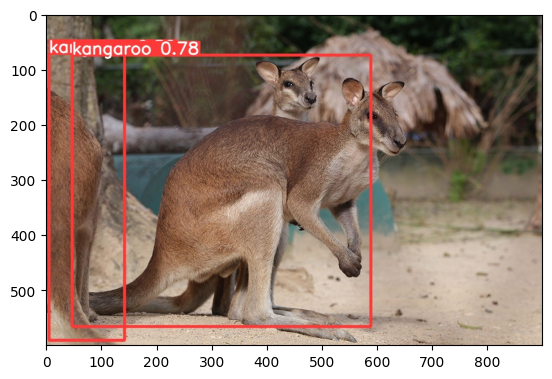

In [15]:
image = Image.open('/content/yolov5/runs/detect/exp/00010.jpg')
plt.imshow(image)

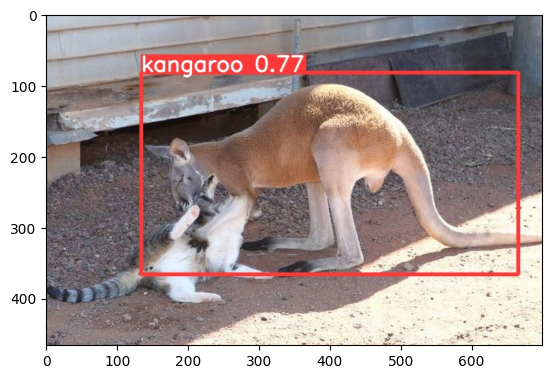

In [16]:
image = Image.open('/content/yolov5/runs/detect/exp2/00100.jpg')
plt.imshow(image)

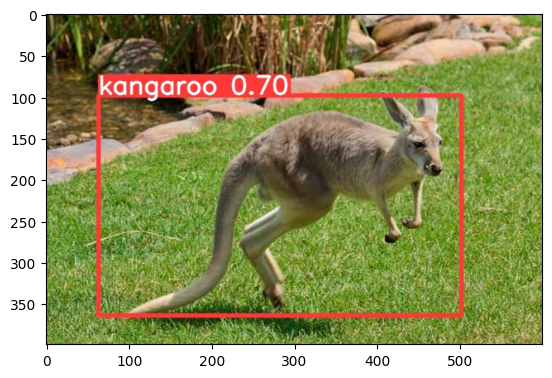

In [17]:
image = Image.open('/content/yolov5/runs/detect/exp3/00109.jpg')
plt.imshow(image)

### Try on a Youtube video

In [ ]:
# Interrupt runtime after 1 min if the video is too long
#!python detect.py --source 'https://www.youtube.com/watch?v=wqctLW0Hb_0'
!python detect.py --source 'https://youtu.be/KBsqQez-O4w'

Streaming output truncated to the last 5000 lines.
0: 384x640 10 cars, 2 trucks, 6.4ms
0: 384x640 9 cars, 1 truck, 6.3ms
0: 384x640 9 cars, 1 truck, 6.3ms
0: 384x640 9 cars, 1 truck, 6.3ms
0: 384x640 9 cars, 1 truck, 6.3ms
0: 384x640 9 cars, 1 truck, 6.3ms
0: 384x640 9 cars, 1 truck, 6.3ms
0: 384x640 9 cars, 1 truck, 6.3ms
0: 384x640 9 cars, 1 truck, 6.4ms
0: 384x640 9 cars, 1 truck, 6.4ms
0: 384x640 9 cars, 1 truck, 8.8ms
0: 384x640 9 cars, 1 truck, 10.6ms
0: 384x640 9 cars, 1 truck, 6.4ms
0: 384x640 9 cars, 1 truck, 6.3ms
0: 384x640 9 cars, 1 truck, 7.8ms
0: 384x640 9 cars, 1 truck, 6.7ms
0: 384x640 9 cars, 1 truck, 10.7ms
0: 384x640 9 cars, 1 truck, 6.4ms
0: 384x640 9 cars, 1 truck, 9.3ms
0: 384x640 9 cars, 1 truck, 6.4ms
0: 384x640 9 cars, 1 truck, 6.4ms
0: 384x640 9 cars, 1 truck, 6.4ms
0: 384x640 9 cars, 1 truck, 6.4ms
0: 384x640 9 cars, 1 truck, 6.6ms
0: 384x640 9 cars, 1 truck, 6.4ms
0: 384x640 9 cars, 1 truck, 6.4ms
0: 384x640 9 cars, 1 truck, 6.4ms
0: 384x640 9 cars, 1 truck,

In [ ]:
# Convert mp4 to webm
!ffmpeg -i /content/yolov5/runs/detect/exp7/KBsqQez-O4w.mp4 -vcodec vp9 ./DetectionResult.webm

ffmpeg version 4.2.7-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.4.0-1ubuntu1~20.04.1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --e

In [ ]:
# Check the Result!!
import io
from base64 import b64encode
from IPython.display import HTML

with  io.open('/content/yolov5/DetectionResult.webm','r+b') as f:
    mp4 = f.read()
data_url = "data:video/webm;base64," + b64encode(mp4).decode()
HTML("""
<video width=800 controls>
      <source src="%s" type="video/webm">
</video>
""" % data_url)

Output hidden; open in https://colab.research.google.com to view.

# Step 7: Display performance analysis

Training results are automatically logged to Tensorboard and CSV as `results.csv`, which is plotted as `results.png` (below) after training completes. You can also plot any `results.csv` file manually:

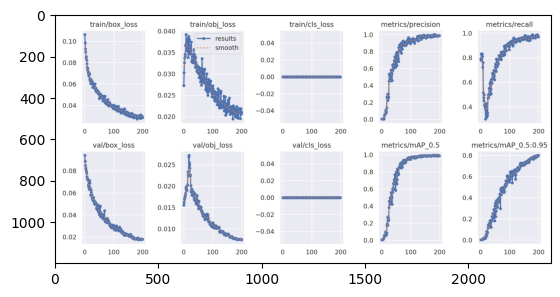

In [18]:
image = Image.open('/content/yolov5/runs/train/exp/results.png') # Change 'exp' to the last in the train directory
plt.imshow(image)

In [20]:
#[OPTIONAL] Alternate way of ploting the curves from CSV file
from utils.plots import plot_results
# Change the path to the last exp under train folder.
plot_results('/content/yolov5/runs/train/exp/results.csv')  # plot 'results.csv' as 'results.png'